In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from gm import gm3s


# Define the analytical solution for feq in response to a constant warming trend
# (Christain et al., 2018)

def calc_feq(t, tau):
    eps = 1 / np.sqrt(3)
    feq = (1
           - (3 * eps * tau) / t * (1 - np.exp(-t / (eps * tau)))
           + np.exp(-t / (eps * tau)) * (t / (2 * eps * tau) + 2))
    return feq


In [2]:
t = np.arange(0, 200)
melt_factor = -0.65
b_p = np.linspace(0, -1, len(t))  # constant warming trend with final value of -1 m/yr
b_p = b_p * melt_factor
taus = [10, 25, 75]
results = {}
for tau in taus:
    params_3s = dict(
        dt=0.01,
        Atot=10,
        L=10,
        H=100,
        bt=0,
        b_p=b_p,
        ts=t,
    )
    res = gm3s(tau=tau, **params_3s).run()
    res.L_p = res.L_p
    res.feq = res.L_p / (res.L_eq - res.L_bar)
    res.feq = res.feq[::100]  # resample from 20k to 200
    res.feq_analytic = calc_feq(t, tau)  # compare w/ analytical result
    res.feq_error = np.abs(res.feq_analytic - res.feq)
    results[tau] = res  # save to dict


/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_27579/1946397721.py:19: RuntimeWarning: invalid value encountered in divide
  res.feq = res.L_p / (res.L_eq - res.L_bar)
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_27579/219916387.py:14: RuntimeWarning: divide by zero encountered in divide
  - (3 * eps * tau) / t * (1 - np.exp(-t / (eps * tau)))
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_27579/219916387.py:14: RuntimeWarning: invalid value encountered in multiply
  - (3 * eps * tau) / t * (1 - np.exp(-t / (eps * tau)))


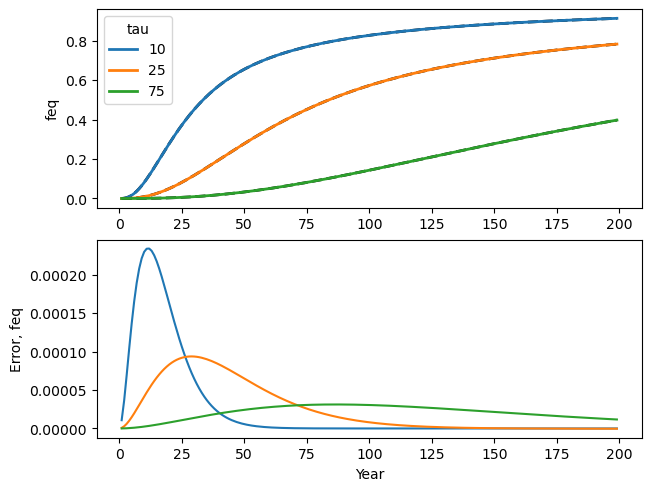

In [3]:
fig, ax = plt.subplots(2, 1, layout='constrained')
colors = mpl.colormaps['tab10'].colors
for i, (tau, res) in enumerate(results.items()):
    ax[0].plot(t, res.feq_analytic, ls='--', lw=2, c='black')
    ax[0].plot(t, res.feq, label=f'{tau}', lw=2, c=colors[i])
    ax[1].plot(t, res.feq_analytic - res.feq, label=f'{tau}')
ax[0].legend(title='tau')
ax[0].set_ylabel('feq')
ax[1].set_ylabel('Error, feq')
ax[1].set_xlabel('Year')